- graphs starting quantities at zero
- graph prettiness
- store pvalues
- conversation about type 1 and 2 errors
- ANOVA tukey graph, talk about CI
- proof for dropping item number 11 and 42 (their prices changed three times)

<img src='images/Northwind_ERD_updated.png.'>

<a href='#1.0-Initial-Question'>**1.0 Initial Question**</a>

<a href='#1.1-Initial-Hypothesis'>**1.1 Initial Hypothesis**</a>
- <a href='#1.1.1-Null-Hypothesis'>1.1.1 Null Hypothesis</a>
- <a href='#1.1.2-Alternative-Hypothesis'>1.1.2 Alternative Hypothesis</a>
- <a href='#1.1.3-Features'>1.1.3 Features</a>
- <a href='#1.1.4-Target-Variable'>1.1.4 Target Variable</a>

<a href='#1.2-Methodology'>**1.2 Methodology**</a>
- <a href='#1.2.1-Obtain-Data'>1.2.1 Obtain Data</a>
- <a href='#1.2.2-Scrub-Data'>1.2.2 Scrub Data</a>
    - <a href='#1.2.2.1-Manage-n/a-data-types'>1.2.2.1 Manage n/a data types</a>
    - <a href='#1.2.2.2-Remove-duplicate-data'>1.2.2.2 Remove duplicate data</a>
    - <a href='#1.2.2.3-Manage-data-typs'>1.2.2.3 Manage data types</a>
    - <a href='#1.2.2.4-Remove-outliers'>1.2.2.4 Remove outliers</a>
- <a href='#1.2.3-Explore-Data'>1.2.3 Explore Data</a>
    - <a href='#1.2.3.1-Visualize-data'>1.2.3.1 Visualize data</a>
    - <a href='#1.2.3.2-Transform-data'>1.2.3.2 Transform data</a>
    - <a href='#1.2.3.3-Sort-data-/-Prepare-data-for-testing'>1.2.3.3 Sort data / Prepare data for testing</a>
    - <a href='#1.2.3.4-Develop-feature'>1.2.3.4 Develop Feature</a>
- <a href='#1.2.4-Model-Data'>1.2.4 Model Data</a>
    - <a href='#1.2.4.1-Check-for-data-normality'>1.2.4.1 Check for data normality</a>
    - <a href='#1.2.4.2-Standard-deviation-and-other-basic-statistics'>1.2.4.2 Standard deviation and other basic statistics</a>
    - <a href='#1.2.4.3-Statistical-test'>1.2.4.3 Statistical test</a>
    - <a href='#1.2.4.4-Verification-techniques'>1.2.4.4 Verification techniques</a>
        - <a href='#1.2.4.4.1-Nonparametric-testing-and-confirmatory-testing'>1.2.4.4.1 Nonparametric testing</a>
        - <a href='#1.2.4.4.2-Effect-size'>1.2.4.4.2 Effect size</a>
        - <a href='#1.2.4.4.3-Error'>1.2.4.4.3 Error</a>
- <a href='#1.2.5-Interpret-Model'>1.2.5 Interpret Model</a>
    - <a href='#1.2.5.1-Extension-of-acquired-knowledge'>1.2.5.1 Extension of acquired knowledge</a>
    
<a href='#1.3-Results'>**1.3 Results**</a>

<a href='#1.4-Conclusions'>**1.4 Conclusions**</a>

- <a href='#1.4.1-Actionable-Items-and-Insights'>1.4.1 Actionable Items and Insights</a>
- <a href='#1.4.2-Additional-Visuals'>1.4.2 Additional Visuals</a>

<a href='#1.5-Future-Work'>**1.5 Future Work**</a>

<a href='#1.6-References'>**1.6 References**</a>

# 1.0 Initial Question<a id='Initial Question'></a>
Do the changes in product pricing affect spending?

# 1.1 Initial Hypothesis<a id='Initial Hypothesis'></a>

### 1.1.1 Null Hypothesis<a id='Null Hypothesis'></a>
H0: no effect - there is no change to spending based on product pricing

### 1.1.2 Alternative Hypothesis<a id='Alternative Hypothesis'></a>
HA: there is an effect - there is a change to spending based on product pricing

### 1.1.3 Features<a id='Features'></a>
: spending

### 1.1.4 Target Variable<a id='Target Variable'></a>
: reorder/frieght

# 1.2 Methodology<a id='Methodology'></a>

To evaluate, I have chosen to use the following steps:
- Obtain Data
- Scrub Data
- Explore Data
- Modeling
- Interpret

I have found that the OSEMN method explains the data science process, and gives context to exploring data.

## 1.2.1 Obtain Data<a id='Obtain Data'></a>

The data we're evaluating comes from the 'Northwind_small.sqlite' file in this repository. We'll need to pull the following tables and the following lines of information:

- Product
    - ProductId
    - ReorderLevel
- Order
    - OrderId
    - ShipVia
    - Frieght
- OrderDetail
    - OrderId
    - ProductId
    - UnitPrice
    - Quantity

In [ ]:
# develop class
pass

In [2]:
# import py file
from classes import Pvalue

In [3]:
# import libraries
import pandas as pd
import sqlite3

import numpy as np
from numpy import std, mean, sqrt
import scipy.stats as stats
from scipy.stats import wilcoxon
from statsmodels.stats.power import tt_ind_solve_power
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('Solarize_Light2')
import seaborn as sns

idx = pd.IndexSlice

In [4]:
# import data
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

In [4]:
# Order data
cur.execute("""SELECT *
               FROM 'Order';
               """)
df_order = pd.DataFrame(cur.fetchall())
df_order.columns = [x[0] for x in cur.description]
df_order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [5]:
# OrderDetail data
cur.execute("""SELECT *, UnitPrice*Quantity as OrderTotal
               FROM OrderDetail;
               """)
df_orderdetail = pd.DataFrame(cur.fetchall())
df_orderdetail.columns = [x[0] for x in cur.description]
df_orderdetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderTotal
0,10248/11,10248,11,14.0,12,0.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0


In [7]:
# Product data
cur.execute("""SELECT *
               FROM Product;
               """)
df_product = pd.DataFrame(cur.fetchall())
df_product.columns = [x[0] for x in cur.description]
df_product.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [5]:
# Importing all data
cur.execute("""SELECT 'Order'.Id, OrderDate, ShipVia, Freight, Product.UnitPrice as ProductPrice, 
OrderDetail.UnitPrice as OrderPrice, Quantity, ReorderLevel, OrderDetail.ProductId, OrderDetail.Discount
               FROM OrderDetail
               LEFT JOIN 'Order' ON OrderDetail.OrderID = 'Order'.Id
               JOIN Product ON OrderDetail.ProductId = Product.Id
               ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderDate,ShipVia,Freight,ProductPrice,OrderPrice,Quantity,ReorderLevel,ProductId,Discount
0,10248,2012-07-04,3,32.38,21.00,14.0,12,30,11,0.0
1,10248,2012-07-04,3,32.38,14.00,9.8,10,0,42,0.0
2,10248,2012-07-04,3,32.38,34.80,34.8,5,0,72,0.0
3,10249,2012-07-05,1,11.61,23.25,18.6,9,0,14,0.0
4,10249,2012-07-05,1,11.61,53.00,42.4,40,10,51,0.0


## 1.2.2 Scrub Data<a id='Scrub Data'></a>

The following scrubbing techniques were applied to the original data:
- 1.4.1 Manage n/a data types
- 1.4.2 Remove duplicate rows
- 1.4.3 Manage data types
- 1.4.4 Remove outliers

### Manage n/a data types

In [7]:
# nans identification
print(len(df))
df.isna().sum()

2155


Id              0
OrderDate       0
ShipVia         0
Freight         0
ProductPrice    0
OrderPrice      0
Quantity        0
ReorderLevel    0
ProductId       0
Discount        0
dtype: int64

### Delete duplicate data

In [8]:
# identification of duplicate data
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [37]:
# code to drop duplicate rows if necessary
# sort1.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(sort1.duplicated().sum()))

### Data types

First, let's see what the data types for this data set are.

In [9]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [10]:
# data type identification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 10 columns):
Id              2155 non-null int64
OrderDate       2155 non-null datetime64[ns]
ShipVia         2155 non-null int64
Freight         2155 non-null float64
ProductPrice    2155 non-null float64
OrderPrice      2155 non-null float64
Quantity        2155 non-null int64
ReorderLevel    2155 non-null int64
ProductId       2155 non-null int64
Discount        2155 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 168.5 KB


### Find outliers

In [11]:
df_drop = df[df['ProductId']!=11]
df_drop = df_drop[df_drop['ProductId']!=42]

In [16]:
#unique product ids
unique_product_ids = df_drop.ProductId.unique()
unique_product_ids

count_unique_product_prices = [len(df[df.index.get_values() == x]['OrderPrice'].unique()) for x in unique_product_ids]
count_unique_product_prices

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

length of cleaner dataset: 2087


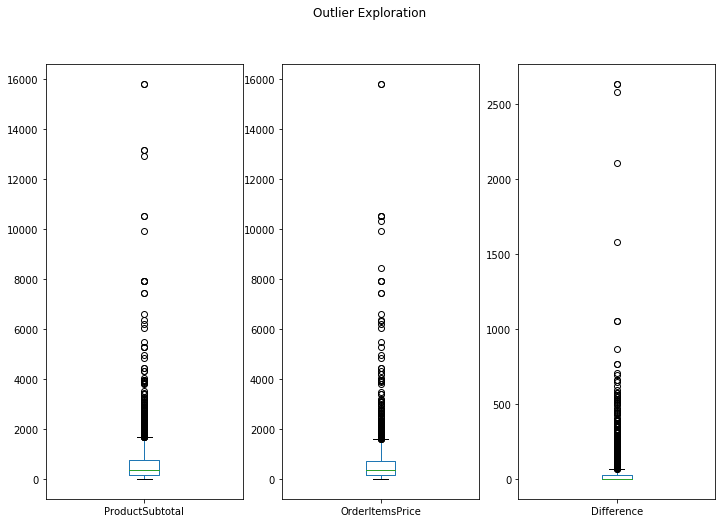

In [41]:
# outlier identification
print('length of cleaner dataset: ' + str(len(sort1)))

fig01 = plt.figure(figsize=(12,8))
fig01.suptitle('Outlier Exploration')

ax = fig01.add_subplot(131)
ax1 = df_drop.ProductSubtotal.plot(kind='box')
ax = fig01.add_subplot(132)
ax2 = df_drop.OrderItemsPrice.plot(kind='box')
ax = fig01.add_subplot(133)
ax3 = df_drop.Difference.plot(kind='box')

length of cleaner dataset: 1494


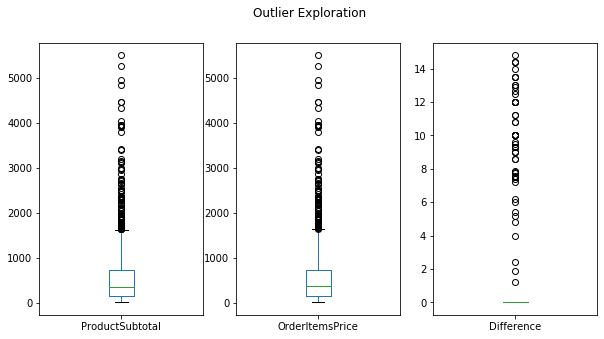

In [42]:
# management of outliers
no_outliers = df_drop.loc[df_drop['ProductSubtotal'] < 6000]
no_outliers = no_outliers.loc[no_outliers['OrderItemsPrice'] < 6000]
no_outliers = no_outliers.loc[no_outliers['Difference'] < 15]
print('length of cleaner dataset: ' + str(len(no_outliers)))

fig02 = plt.figure(figsize=(10,5))
fig02.suptitle('Outlier Exploration')

ax = fig02.add_subplot(131)
ax1 = no_outliers.ProductSubtotal.plot(kind='box')
ax = fig02.add_subplot(132)
ax2 = no_outliers.OrderItemsPrice.plot(kind='box')
ax = fig02.add_subplot(133)
ax3 = no_outliers.Difference.plot(kind='box')

# Explore Data

For a quick preview of what we have to work with, we'll use the describe method.

In [48]:
# describe data
no_outliers.describe()

,Id,ShipVia,Freight,ProductPrice,OrderPrice,Quantity,ReorderLevel,ProductId,Discount,ProductSubtotal,OrderItemsPrice,Difference
count,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,10768.769076,1.955154,98.433092,26.091553,26.006593,22.613788,11.900937,40.734940,0.055750,565.586011,565.214116,0.371894
std,187.300650,0.771215,133.773937,26.452908,26.490177,18.952512,10.571459,22.329761,0.083694,677.882962,678.167101,1.954785
min,10248.000000,1.000000,0.020000,2.500000,2.000000,1.000000,0.000000,1.000000,0.000000,6.000000,4.800000,0.000000
25%,10621.250000,1.000000,20.152500,12.500000,12.125000,10.000000,0.000000,22.000000,0.000000,140.000000,140.000000,0.000000
50%,10768.000000,2.000000,53.050000,19.000000,19.000000,20.000000,10.000000,41.000000,0.000000,360.000000,360.000000,0.000000
75%,10928.000000,3.000000,120.920000,34.000000,34.000000,30.000000,20.000000,60.000000,0.100000,735.750000,735.750000,0.000000
max,11077.000000,3.000000,1007.640000,263.500000,263.500000,130.000000,30.000000,77.000000,0.250000,5500.000000,5500.000000,14.800000


So far, the best looking data is quantity. However, our target information is Item Total.

### Visualize data

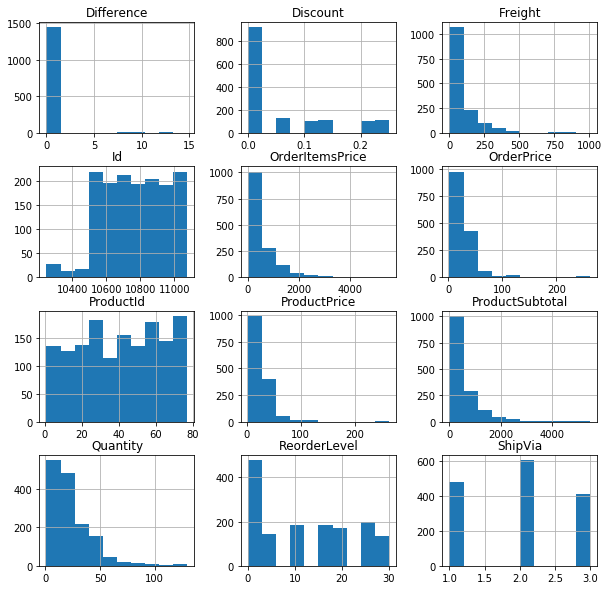

In [49]:
# visualize data
no_outliers.hist(figsize=(10,10));

This data looks like it needs a log transformation to be predictable. Alternatively, a non-parametric test could be used on the original data.

### Develop feature

It would be useful to be able to evaluate the total amount for each item in an order.

In [81]:
df_drop['ProductSubtotal'] = df_drop['ProductPrice'] * df_drop['Quantity']
df_drop['OrderItemsPrice'] = df_drop['OrderPrice'] * df_drop['Quantity']
df_drop['Difference'] = df_drop['ProductSubtotal'] - df_drop['OrderItemsPrice']
df_drop.head()

,Id,OrderDate,ShipVia,Freight,ProductPrice,OrderPrice,Quantity,ReorderLevel,ProductId,Discount,ProductSubtotal,OrderItemsPrice,Difference
2,10248,2012-07-04,3,32.38,34.80,34.8,5,0,72,0.00,174.00,174.0,0.00
3,10249,2012-07-05,1,11.61,23.25,18.6,9,0,14,0.00,209.25,167.4,41.85
4,10249,2012-07-05,1,11.61,53.00,42.4,40,10,51,0.00,2120.00,1696.0,424.00
5,10250,2012-07-08,2,65.83,9.65,7.7,10,10,41,0.00,96.50,77.0,19.50
6,10250,2012-07-08,2,65.83,53.00,42.4,35,10,51,0.15,1855.00,1484.0,371.00


### Log Transformation

In [50]:
# # sort data
log_orderItemsPrice = no_outliers['OrderItemsPrice'].map(lambda x: np.log(x))
log_productSubtotal = no_outliers['ProductSubtotal'].map(lambda x: np.log(x))

no_outliers['OrderItemsPrice'] = log_orderItemsPrice
no_outliers['ProductSubtotal'] = log_productSubtotal

Observations about sorted data

# Model Data
Below is the model after scrubbing and exploring have been managed, let's see what the model picks up.

### Data normality

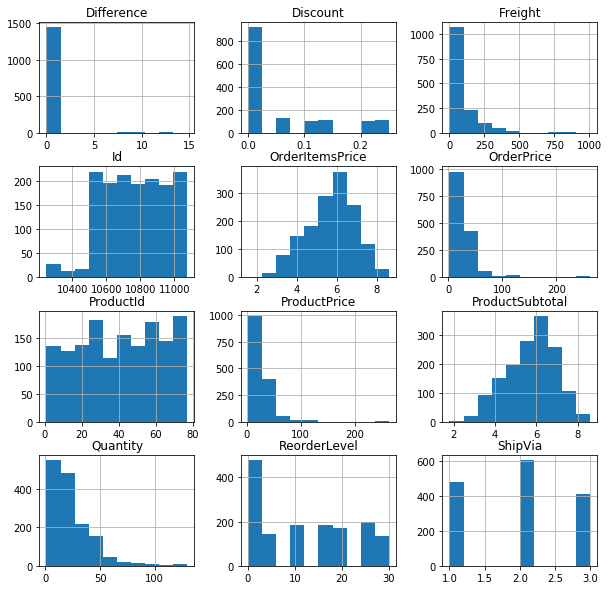

In [51]:
# visual/code for data normality
no_outliers.hist(figsize=(10,10));

### Standard deviation

In [52]:
# standard deviation for target variable
print('ProductSubtotal')
print('mean: ' + str(mean(no_outliers['ProductSubtotal'])))
print('standard deviation: ' + str(std(no_outliers['ProductSubtotal'])))

print('OrderDetailSubtotal')
print('mean: ' + str(mean(no_outliers['OrderItemsPrice'])))
print('standard deviation: ' + str(std(no_outliers['OrderItemsPrice'])))

ProductSubtotal
mean: 5.7243997128443365
standard deviation: 1.1921612959959587
OrderDetailSubtotal
mean: 5.71569342926278
standard deviation: 1.2070679160994204


### Basic testing

In [53]:
# set up variables for this particular test
product = no_outliers['ProductSubtotal']
orderDetail = no_outliers['OrderItemsPrice']
alpha = 0.05

In [54]:
# test
stats.ttest_rel(product, orderDetail)

Ttest_relResult(statistic=7.764806293227816, pvalue=1.508597939227008e-14)

In [82]:
# result
p_value = 1.508597939227008 * 10**-14

In [56]:
# evaluation of result
if alpha > p_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


Preliminarily, we can reject the null hypothesis in favor of the idea that unit price from the Product table and unit price from the OrderDetail table are different. That can mean one of two things, either the Product table unit price includes the discount, or that the product mark up is effective. Let's verify these results.

Summarize results and determine next steps. Might include verification of sample size, error types, non-parametric testing, or a deepening of understanding

### Verification techniques
#### Non-parametric testing

##### H0: the distributions of both samples are equal.
##### H1: the distributions of both samples are not equal.

In [57]:
# non-parametric testing variables are the same as the testing above
# non-parametric test
stats.wilcoxon(product, orderDetail)

WilcoxonResult(statistic=0.0, pvalue=1.0684632202018514e-11)

In [79]:
# result
p_value = 1.0684632202018514 * 10**-11

In [80]:
# evaluation of results
if alpha > p_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


This rejection is even more confident.

#### Effect size

In [60]:
# effect size variables
pass

In [61]:
# effect size test
def cohen_d_two_samp(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)
effect_size = cohen_d_two_samp(product, orderDetail)
effect_size

0.007254997829789402

This effect size is miniscual. There is very little effect of the product unit price on the order detail unit price.

#### Power and error

In [62]:
# power variables
effect_size, nobs1, alpha = effect_size, product.shape[0], alpha

In [63]:
# power test
power = tt_ind_solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha)
power

0.0545132638108292

In [64]:
# power result
p_value = ''

In [65]:
# evaluation of power test
type_2_error = 1 - power
type_2_error

0.9454867361891708

There is a high chance that we have rejected the null hypothesis in error. It might be wise to expand testing.

### Extension of acquired knowledge
#### Deeper question
#### Hypothesis for deeper question

In [68]:
#unique product ids
unique_product_ids = df_drop.ProductId.unique()
unique_product_ids

count_unique_product_prices = [len(sort1[sort1.index.get_level_values(3) == x]['OrderPrice'].unique()) for x in unique_product_ids]
count_unique_product_prices

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [69]:
product_prices = df_drop[['ProductId', 'ProductPrice']].sort_values('ProductId').groupby('ProductId').mean().ProductPrice
product_prices

ProductId
1     18.00
2     19.00
3     10.00
4     22.00
5     21.35
      ...  
73    15.00
74    10.00
75     7.75
76    18.00
77    13.00
Name: ProductPrice, Length: 75, dtype: float64

In [70]:
order_prices = df_drop[['ProductId', 'OrderPrice']].sort_values('ProductId').groupby('ProductId').mean().OrderPrice
order_prices

ProductId
1     17.147368
2     17.877273
3      9.500000
4     20.680000
5     19.610000
        ...    
73    14.357143
74     8.769231
75     7.379348
76    16.984615
77    12.110526
Name: OrderPrice, Length: 75, dtype: float64

In [71]:
# deeper understanding test
stats.ttest_rel(product_prices, order_prices)

Ttest_relResult(statistic=6.882288190488461, pvalue=1.6279818776113184e-09)

In [72]:
# deeper understanding result
p_value = 1.6279818776113184*10**-9

In [73]:
# deeper understanding evaluation of result
if alpha > p_value:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


The before and after price changes are definately different.

# Interpret

The prices changes are statistically significant, but more exploration needs to be done.

### Additional visualizations

In [74]:
# visual for blah blah blah
df['ProductId'].unique()

array([11, 42, 72, 14, 51, 41, 65, 22, 57, 20, 33, 60, 31, 39, 49, 24, 55,
       74,  2, 16, 36, 59, 53, 77, 27,  5, 32, 21, 37, 62, 70, 35,  7, 56,
       30, 17, 12, 40, 76, 29, 43, 10, 71, 13, 28, 44, 63, 73, 75, 19, 15,
       67,  1, 34, 46, 54, 68,  3, 64, 18, 69, 66,  4,  6, 58, 52, 25, 38,
       26, 47, 23,  8, 50, 45, 48, 61,  9], dtype=int64)

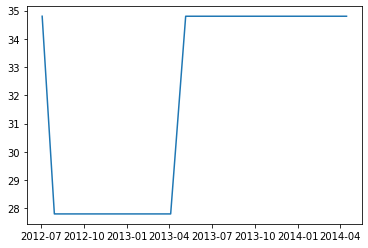

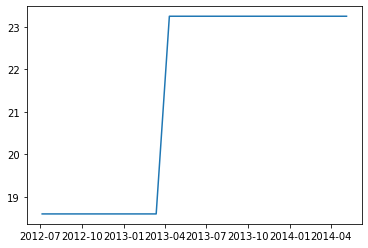

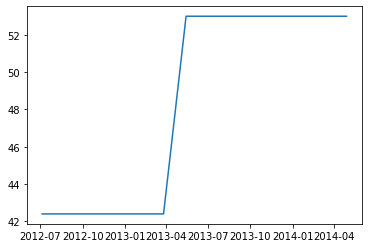

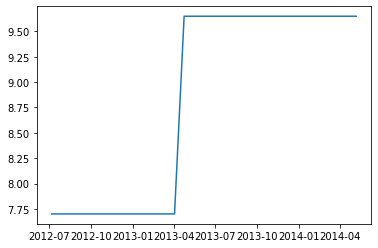

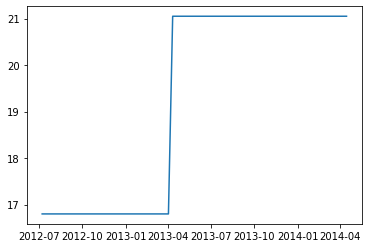

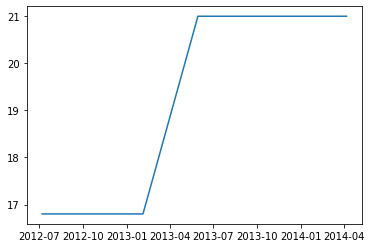

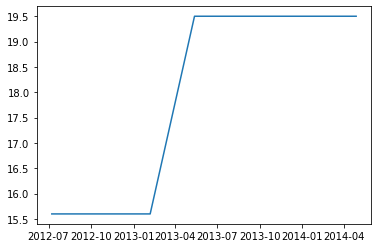

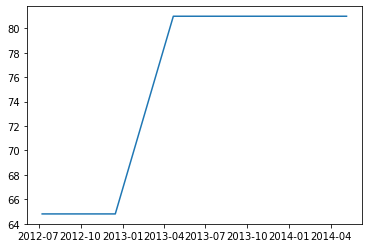

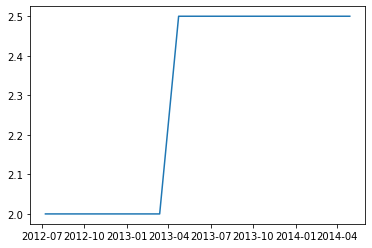

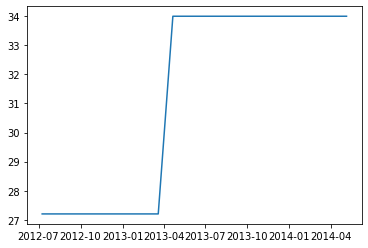

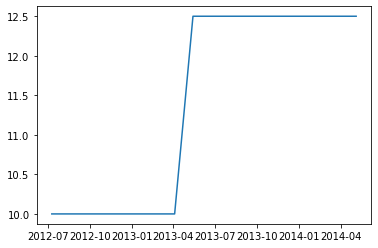

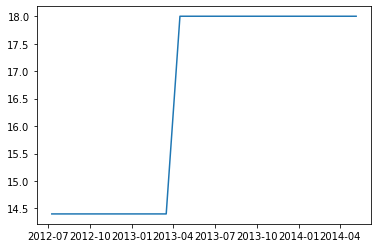

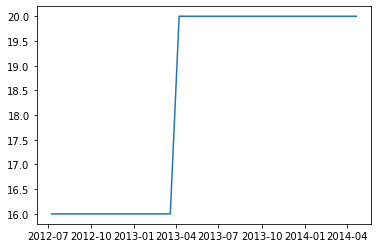

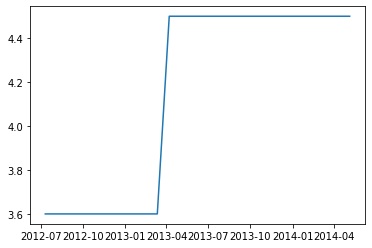

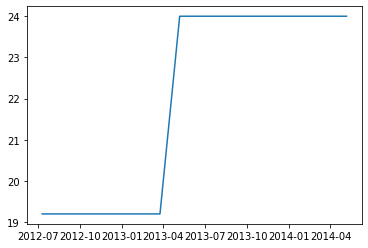

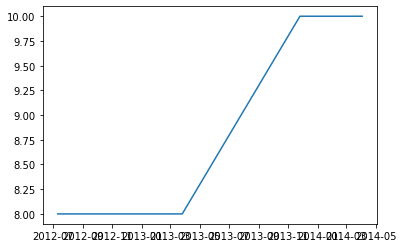

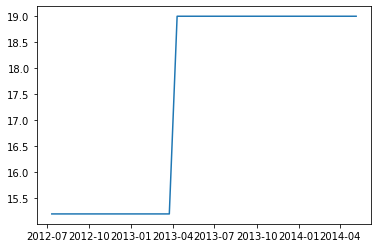

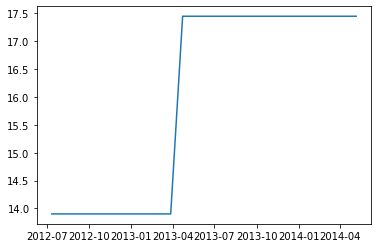

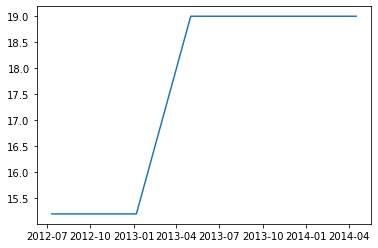

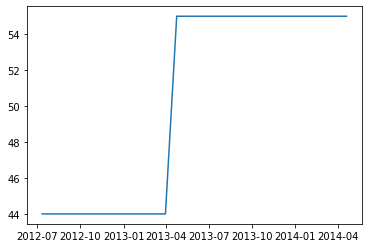

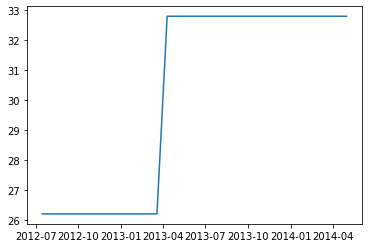

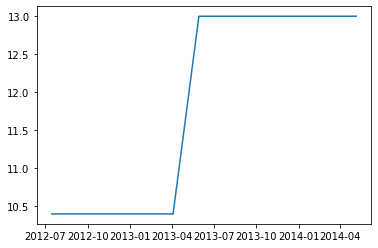

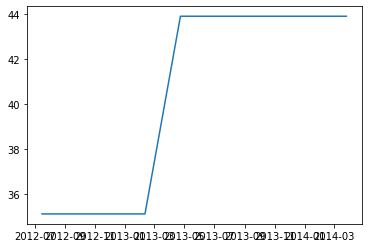

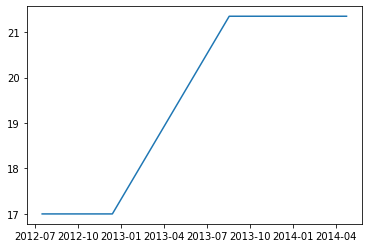

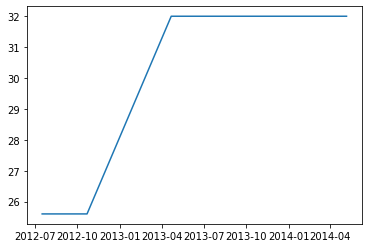

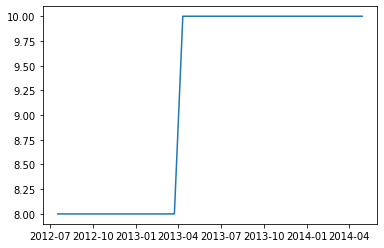

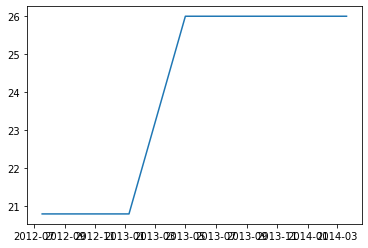

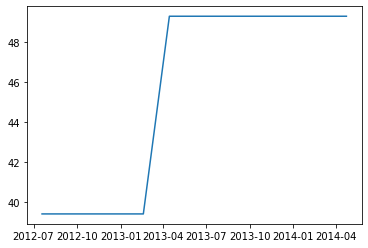

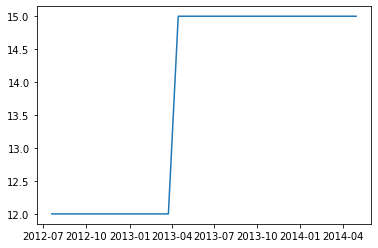

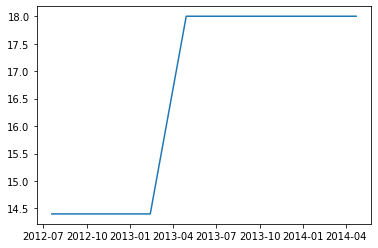

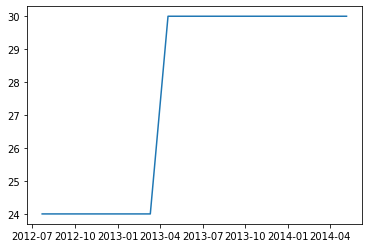

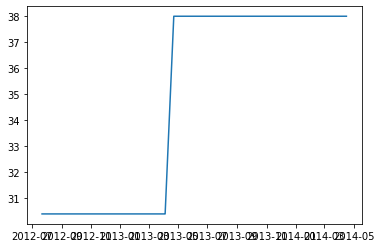

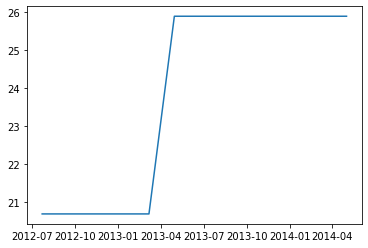

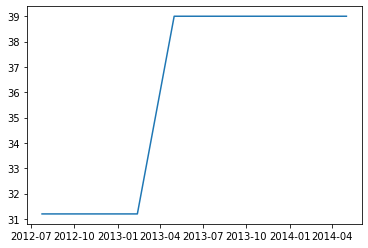

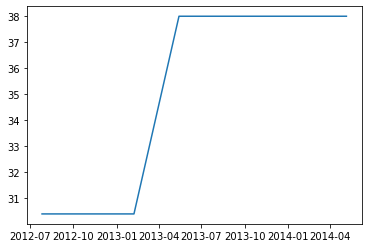

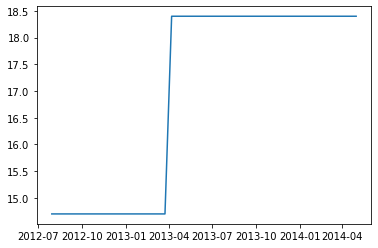

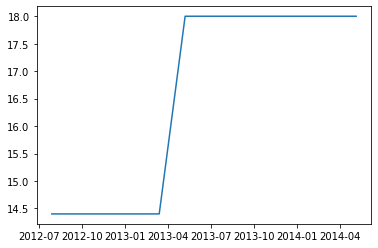

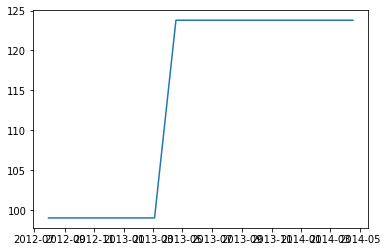

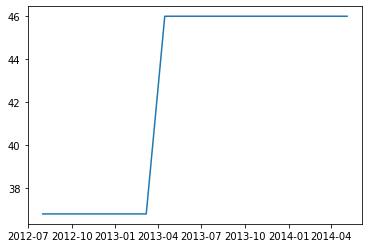

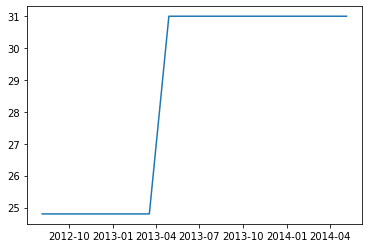

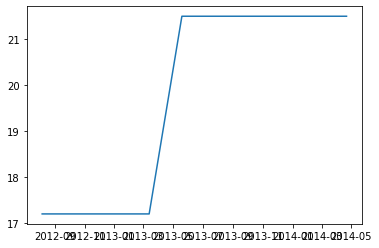

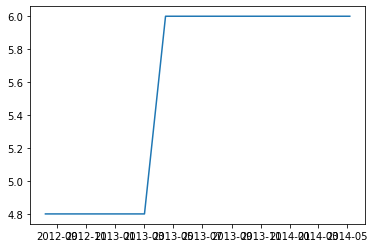

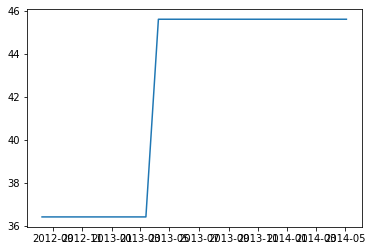

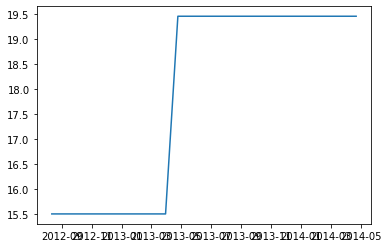

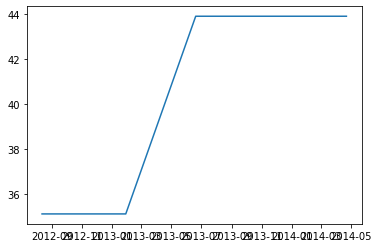

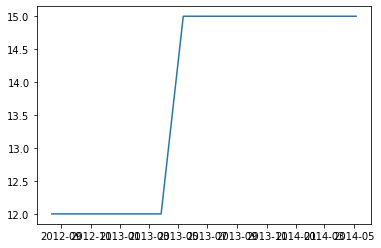

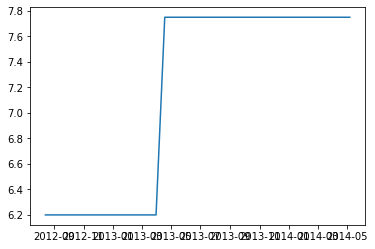

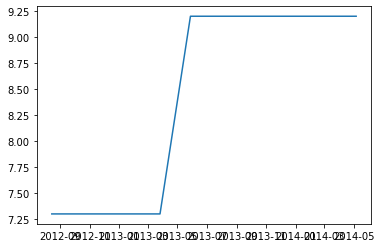

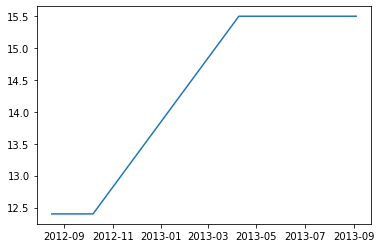

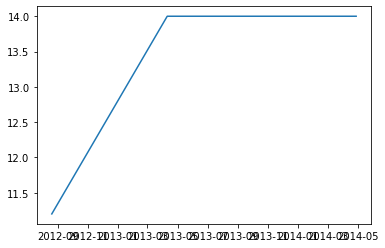

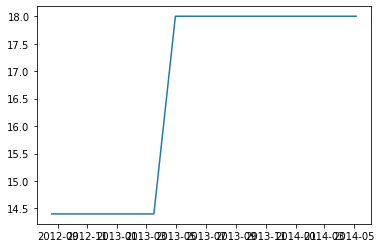

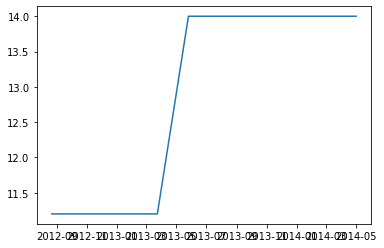

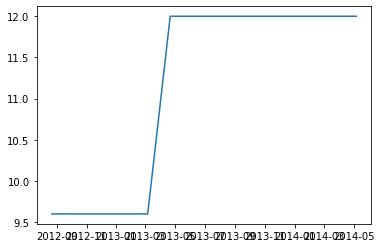

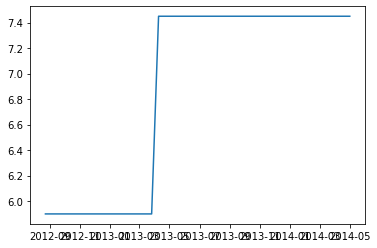

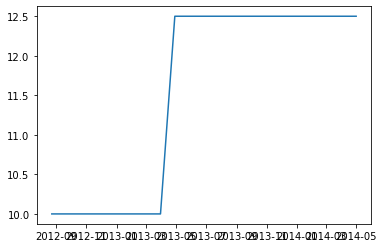

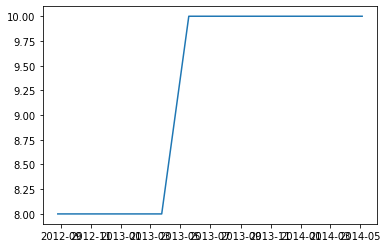

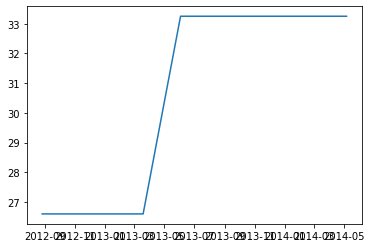

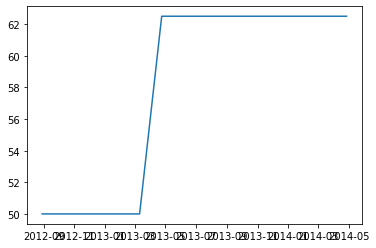

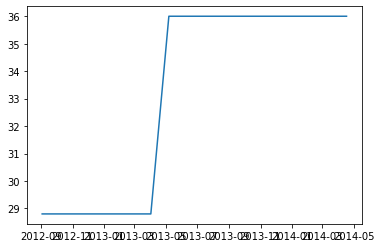

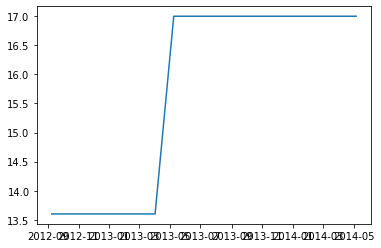

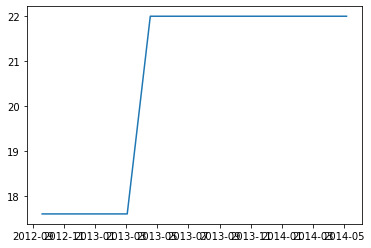

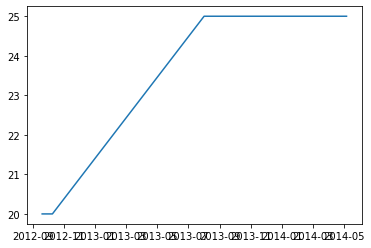

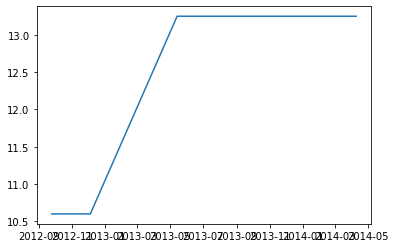

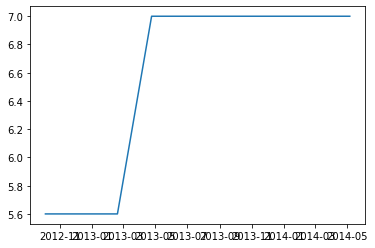

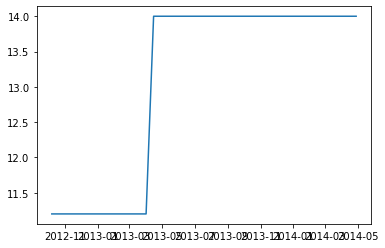

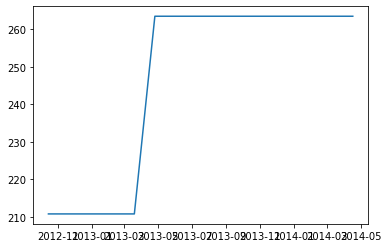

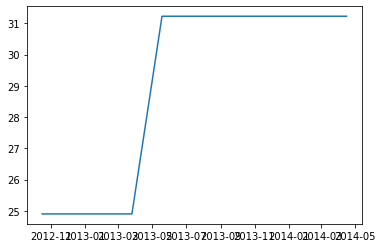

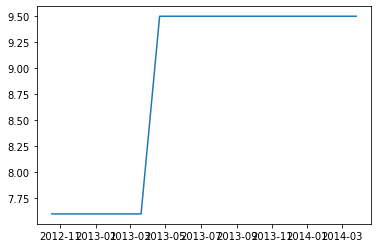

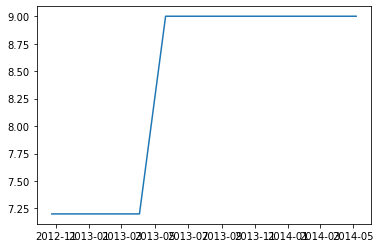

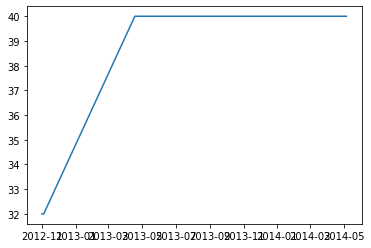

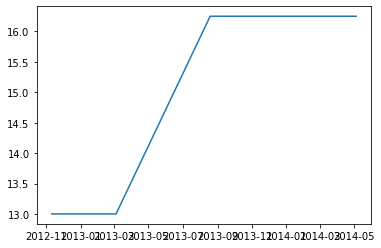

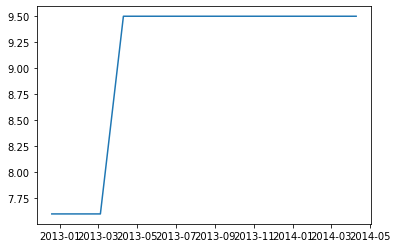

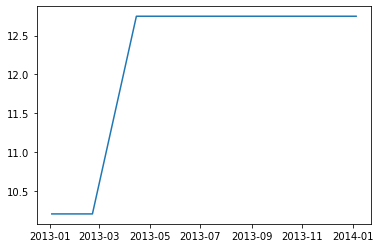

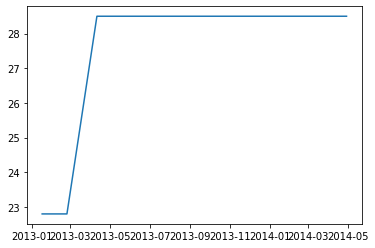

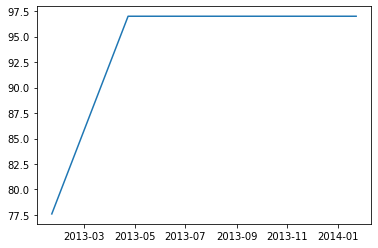

In [75]:
for i in df_drop['ProductId'].unique():
    plt.plot(df_drop[df_drop['ProductId']==i]['OrderDate'], df_drop[df_drop['ProductId']==i]['OrderPrice'])
    plt.show()

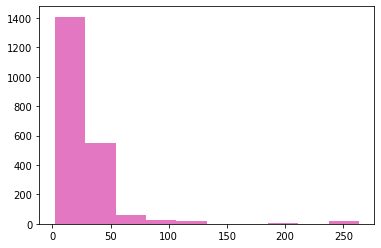

In [76]:
for i in df_drop.OrderDate.unique():
    plt.hist(df_drop['OrderPrice'])

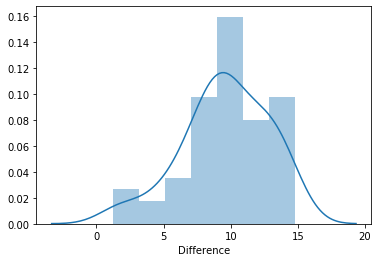

In [77]:
sns.distplot(no_outliers[no_outliers['Difference'] != 0]['Difference']);

# Future Work

Determine the best seasonality for a price change

# Resources

MultiIndexing Data
http://zaxrosenberg.com/pandas-multiindex-tutorial/
https://www.youtube.com/watch?v=kP-0ET0V5Tc